<a href="https://colab.research.google.com/github/baiju3921/AI/blob/main/Final_baiju.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Step 1: Load & Inspect Data**

In [69]:
# Step 1: Load & Inspect Data

# Import required library
import pandas as pd

# Load the dataset (Update the path if needed)
file_path = "/content/drive/MyDrive/3rd sem/global-data-on-sustainable-energy .csv"  # Change if necessary
df = pd.read_csv(file_path)

# Display confirmation message
print("✅ Dataset loaded successfully.")

# Display first few rows
print("\n📌 First 5 rows of the dataset:")
display(df.head())

✅ Dataset loaded successfully.

📌 First 5 rows of the dataset:


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [70]:
# Check dataset shape (rows, columns)
print(f"\n📌 Dataset Shape: {df.shape[0]} rows, {df.shape[1]} columns")



📌 Dataset Shape: 3649 rows, 21 columns


**Step 2: Column Names & Data Types**

In [71]:
# Step 2: Check Column Names & Data Types

# Display all column names
print("📌 Column Names in Dataset:")
print(df.columns.tolist())

# Display data types of each column
print("\n📌 Data Types Overview:")
print(df.dtypes)


📌 Column Names in Dataset:
['Entity', 'Year', 'Access to electricity (% of population)', 'Access to clean fuels for cooking', 'Renewable-electricity-generating-capacity-per-capita', 'Financial flows to developing countries (US $)', 'Renewable energy share in the total final energy consumption (%)', 'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)', 'Primary energy consumption per capita (kWh/person)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'Value_co2_emissions_kt_by_country', 'Renewables (% equivalent primary energy)', 'gdp_growth', 'gdp_per_capita', 'Density\\n(P/Km2)', 'Land Area(Km2)', 'Latitude', 'Longitude']

📌 Data Types Overview:
Entity                                                               object
Year                                                                  int64
Access to electricity (% of population)                             float64
Ac

Observations from Column Names & Data Types

We have identified two issues that need fixing:

1️⃣ Column Name Issue:

Density\n(P/Km2) contains an unnecessary \n (newline character).

We need to clean this by removing special characters and spaces.

2️⃣ Incorrect Data Type:

Density\n(P/Km2) is stored as an object but should be numeric.

We will convert it to float after cleaning.

**Step 3: Clean Column Names & Fix Data Types**

In [72]:
# Step 3: Fully Clean Column Names & Fix Data Types

# 📌 Step 1: Clean column names (remove spaces, special characters, newlines)
df.columns = df.columns.str.replace("\n", " ", regex=True).str.strip()

# 📌 Step 2: Identify the exact column name again (to ensure it was cleaned)
print("📌 Column Names After Cleaning:")
print(df.columns.tolist())

# 📌 Step 3: Rename the column properly
for col in df.columns:
    if "Density" in col and "P/Km2" in col:  # Match dynamically
        df.rename(columns={col: "Density (P/Km2)"}, inplace=True)
        print(f"\n✅ Renamed '{col}' to 'Density (P/Km2)'")

# 📌 Step 4: Convert 'Density (P/Km2)' to numeric
df["Density (P/Km2)"] = pd.to_numeric(df["Density (P/Km2)"], errors="coerce")

# 📌 Step 5: Verify the changes
print("\n✅ Final Column Names:")
print(df.columns.tolist())

print("\n✅ Data Types After Fixing:")
print(df.dtypes)


📌 Column Names After Cleaning:
['Entity', 'Year', 'Access to electricity (% of population)', 'Access to clean fuels for cooking', 'Renewable-electricity-generating-capacity-per-capita', 'Financial flows to developing countries (US $)', 'Renewable energy share in the total final energy consumption (%)', 'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)', 'Primary energy consumption per capita (kWh/person)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'Value_co2_emissions_kt_by_country', 'Renewables (% equivalent primary energy)', 'gdp_growth', 'gdp_per_capita', 'Density\\n(P/Km2)', 'Land Area(Km2)', 'Latitude', 'Longitude']

✅ Renamed 'Density\n(P/Km2)' to 'Density (P/Km2)'

✅ Final Column Names:
['Entity', 'Year', 'Access to electricity (% of population)', 'Access to clean fuels for cooking', 'Renewable-electricity-generating-capacity-per-capita', 'Financial flows to d

**Step 4: Check for Missing Values**

In [73]:
# Step 4: Check for Missing Values

# 📌 Calculate missing values
missing_values = df.isnull().sum()

# 📌 Calculate missing percentage
missing_percentage = (missing_values / len(df)) * 100

# 📌 Create a summary DataFrame
missing_df = pd.DataFrame({"Missing Values": missing_values, "Percentage (%)": missing_percentage})

# 📌 Display only columns with missing values
missing_df = missing_df[missing_df["Missing Values"] > 0].sort_values(by="Percentage (%)", ascending=False)

# 📌 Display missing values summary
print("\n📌 Missing Values Summary:")
print(missing_df)



📌 Missing Values Summary:
                                                    Missing Values  \
Renewables (% equivalent primary energy)                      2137   
Financial flows to developing countries (US $)                2089   
Renewable-electricity-generating-capacity-per-c...             931   
Value_co2_emissions_kt_by_country                              428   
gdp_growth                                                     317   
gdp_per_capita                                                 282   
Energy intensity level of primary energy (MJ/$2...             207   
Renewable energy share in the total final energ...             194   
Access to clean fuels for cooking                              169   
Electricity from nuclear (TWh)                                 126   
Density (P/Km2)                                                106   
Low-carbon electricity (% electricity)                          42   
Electricity from fossil fuels (TWh)                            

**Explanation**

Summary of Missing Data

✔ Severe Missing Data (>50%) – Should be dropped:

Renewables (% equivalent primary energy) (58.56% missing)

Financial flows to developing countries (US $) (57.24% missing)


✔ Moderate Missing Data (10-50%) – Should be imputed:

Renewable-electricity-generating-capacity-per-capita (25.51%)

Value_co2_emissions_kt_by_country (11.72%)


✔ Low Missing Data (<10%) – Can be imputed using mean or median:

gdp_growth (8.68%)

gdp_per_capita (7.72%)

Energy intensity level of primary energy (5.67%)

Access to clean fuels for cooking (4.63%)

Electricity from nuclear (TWh) (3.45%)

Density (P/Km2) (2.90%)

✔ Very Low Missing Data (<1%) – Can be filled or dropped:

Land Area (Km2), Latitude, Longitude (0.02% missing)

Access to electricity (%) (0.27% missing)



**Step 5: Handle Missing Values**

In [74]:
# Step 5: Handling Missing Values

# 1️⃣ Drop columns with too many missing values (>50%)
columns_to_drop = ['Renewables (% equivalent primary energy)', 'Financial flows to developing countries (US $)']
df.drop(columns=columns_to_drop, inplace=True)
print(f"✅ Dropped columns: {columns_to_drop}")

# 2️⃣ Fill missing values using Median (for skewed data)
columns_to_impute_median = [
    'Renewable-electricity-generating-capacity-per-capita',
    'Value_co2_emissions_kt_by_country',
    'Density (P/Km2)'
]
median_values = df[columns_to_impute_median].median()
df[columns_to_impute_median] = df[columns_to_impute_median].fillna(median_values)
print(f"\n✅ Filled missing values (Median):\n{median_values}")

# 3️⃣ Fill missing values using Mean (for normal distribution)
columns_to_impute_mean = [
    'gdp_growth', 'gdp_per_capita', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
    'Renewable energy share in the total final energy consumption (%)', 'Access to clean fuels for cooking',
    'Electricity from nuclear (TWh)', 'Low-carbon electricity (% electricity)'
]
mean_values = df[columns_to_impute_mean].mean()
df[columns_to_impute_mean] = df[columns_to_impute_mean].fillna(mean_values)
print(f"\n✅ Filled missing values (Mean):\n{mean_values}")

# 4️⃣ Drop rows with missing Latitude & Longitude (only 1 row affected)
df.dropna(subset=['Latitude', 'Longitude'], inplace=True)
print("\n✅ Dropped rows with missing Latitude/Longitude")

# 5️⃣ Final check for remaining missing values
print("\n📌 Final Missing Value Check:")
print(df.isnull().sum())


✅ Dropped columns: ['Renewables (% equivalent primary energy)', 'Financial flows to developing countries (US $)']

✅ Filled missing values (Median):
Renewable-electricity-generating-capacity-per-capita       32.91
Value_co2_emissions_kt_by_country                       10500.00
Density (P/Km2)                                            83.00
dtype: float64

✅ Filled missing values (Mean):
gdp_growth                                                              3.441610
gdp_per_capita                                                      13283.774348
Energy intensity level of primary energy (MJ/$2017 PPP GDP)             5.307345
Renewable energy share in the total final energy consumption (%)       32.638165
Access to clean fuels for cooking                                      63.255287
Electricity from nuclear (TWh)                                         13.450190
Low-carbon electricity (% electricity)                                 36.801182
dtype: float64

✅ Dropped rows with missi

**Step 6: Handle Remaining Missing Values**

In [75]:
# Step 6: Fix FutureWarning by using safer assignment

# Use a dictionary-based approach to avoid warnings
df.fillna({
    "Access to electricity (% of population)": df["Access to electricity (% of population)"].mean(),
    "Electricity from fossil fuels (TWh)": df["Electricity from fossil fuels (TWh)"].median(),
    "Electricity from renewables (TWh)": df["Electricity from renewables (TWh)"].median()
}, inplace=True)

# ✅ Final check for missing values
print("\n📌 Final Missing Value Check:")
print(df.isnull().sum())



📌 Final Missing Value Check:
Entity                                                              0
Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable-electricity-generating-capacity-per-capita                0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Value_co2_emissions_kt_by_country                                   0
gdp_growth                                                  

**Step 7: Data Encoding & Feature Engineering**

What Needs Encoding?

From the dataset:

Categorical Features:

Entity (Country or Region name)

Numerical Features (Already in Correct Format)

Since Entity is a country name, we will:

Drop it if it is not needed for prediction.

Encode it using Label Encoding if we plan to use it.


In [76]:
# Step 7: Data Encoding & Feature Engineering

from sklearn.preprocessing import LabelEncoder

# 📌 Check unique categories in 'Entity'
print("\n📌 Unique values in 'Entity':", df["Entity"].nunique())

# 📌 Encode 'Entity' (Convert country names to numbers)
encoder = LabelEncoder()
df["Entity_encoded"] = encoder.fit_transform(df["Entity"])

# 📌 Drop original 'Entity' column if not needed
df.drop(columns=["Entity"], inplace=True)

# ✅ Display first few rows to confirm encoding
print("\n✅ First 5 rows after encoding:")
display(df.head())



📌 Unique values in 'Entity': 175

✅ First 5 rows after encoding:


,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density (P/Km2),Land Area(Km2),Latitude,Longitude,Entity_encoded
0,2000,1.613591,6.2,9.22,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,3.441610,13283.774348,60.0,652230.0,33.93911,67.709953,0
1,2001,4.074574,7.2,8.86,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,3.441610,13283.774348,60.0,652230.0,33.93911,67.709953,0
2,2002,9.409158,8.2,8.47,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,3.441610,179.426579,60.0,652230.0,33.93911,67.709953,0
3,2003,14.738506,9.5,8.09,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0,33.93911,67.709953,0
4,2004,20.064968,10.9,7.75,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0,33.93911,67.709953,0


Encoding Completed Successfully!

✔ Entity has been converted to Entity_encoded (numerical format).

✔ The dataset is now fully cleaned and ready for analysis.



**Step 8: Exploratory Data Analysis (EDA)**

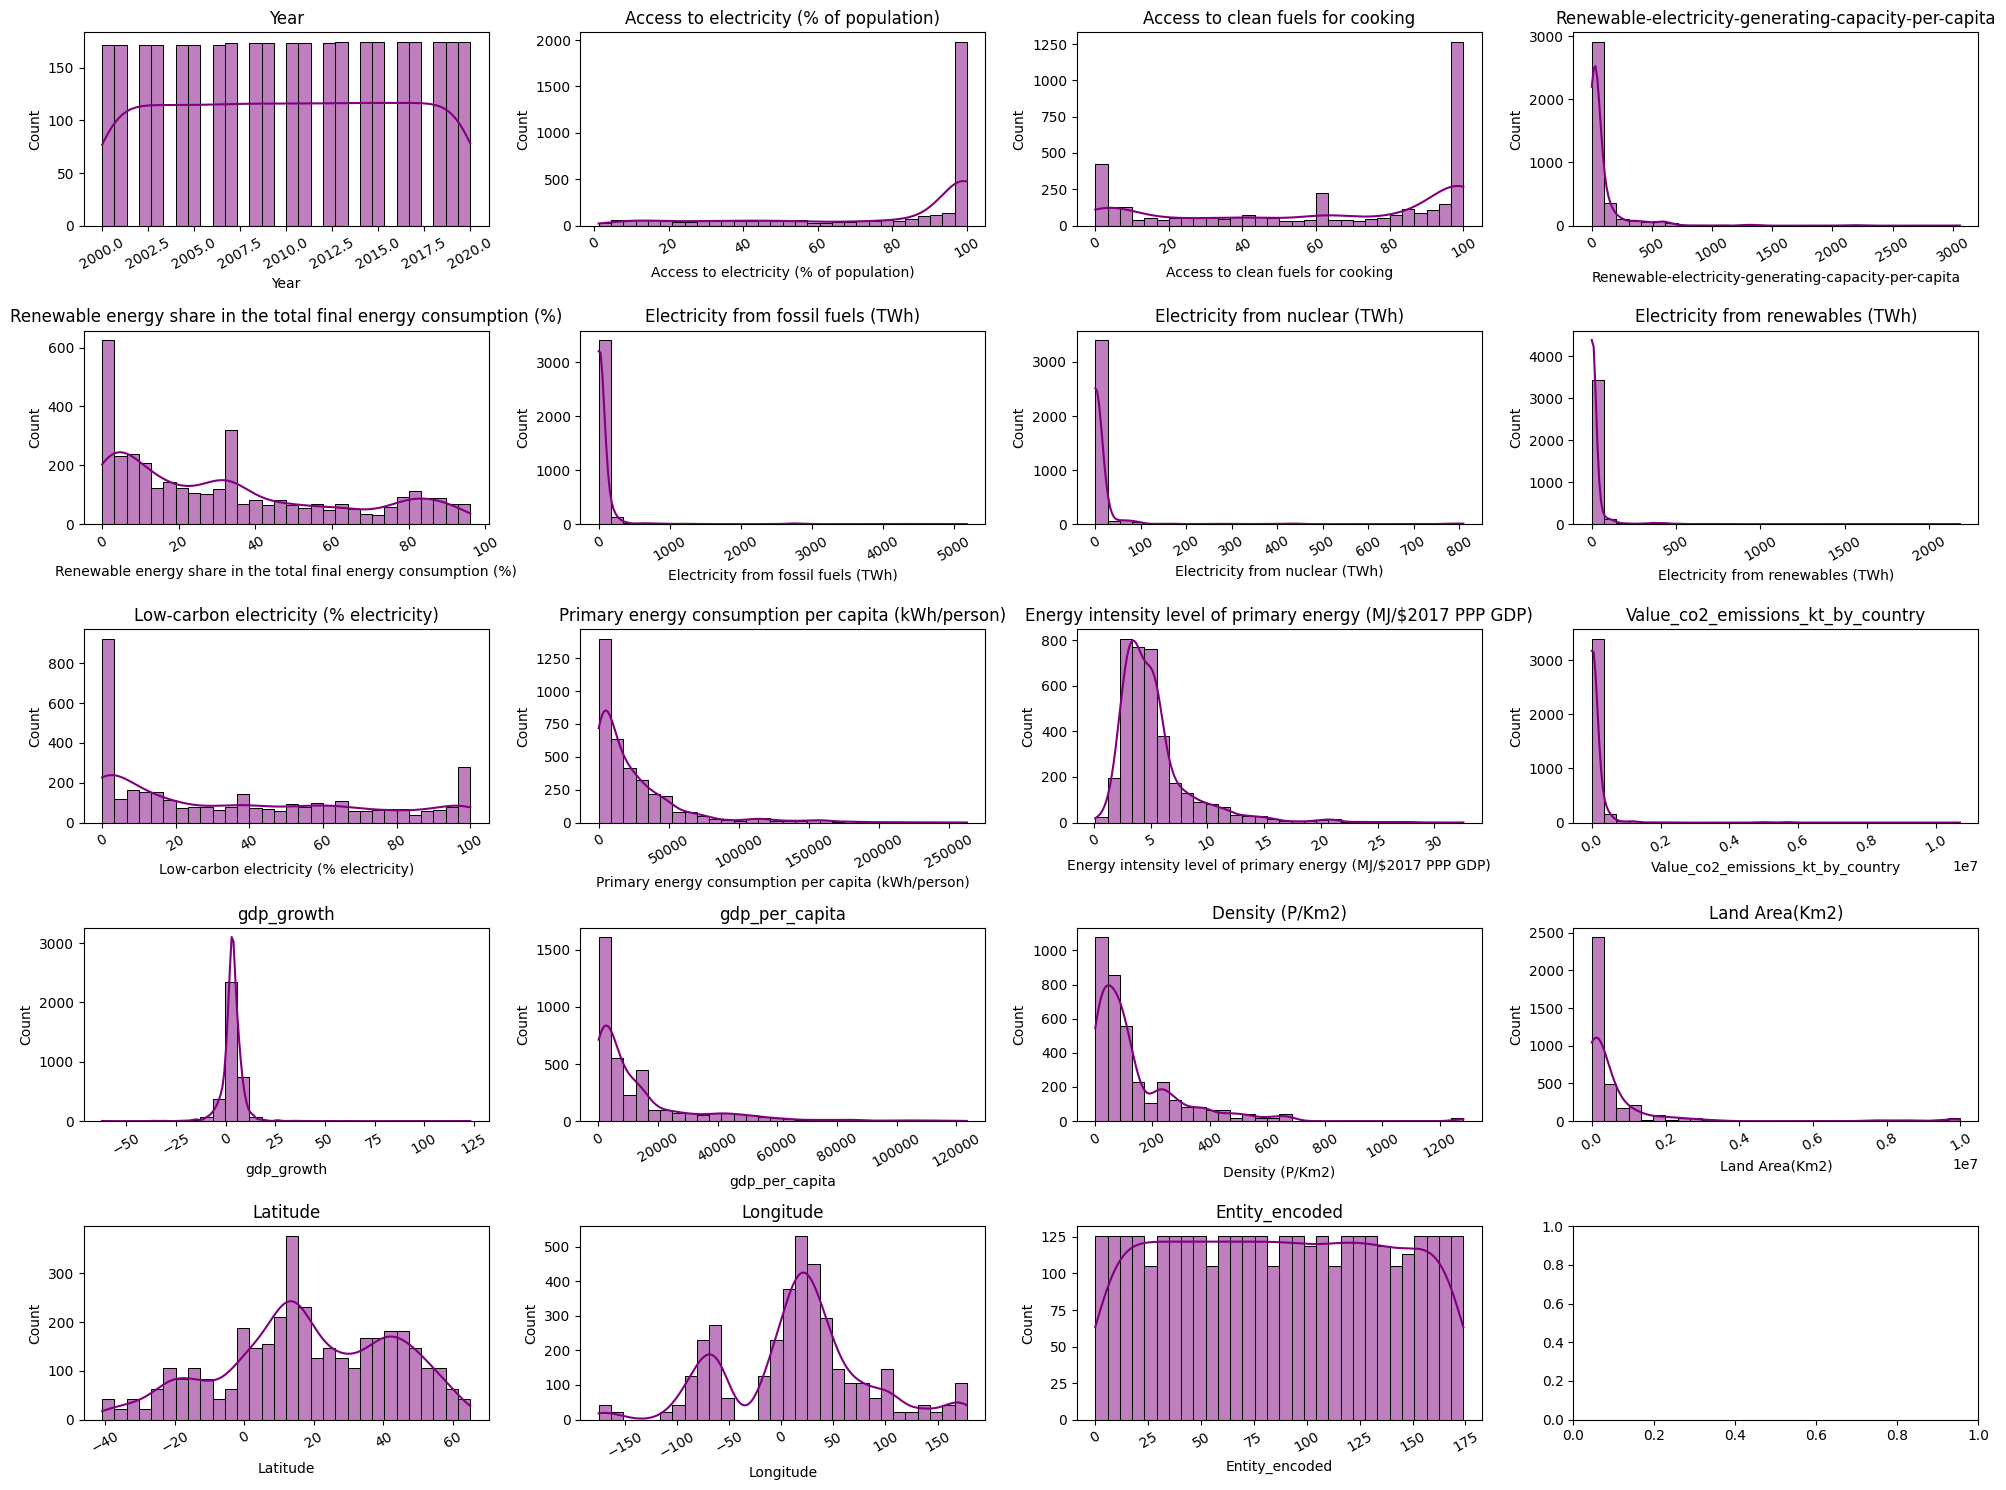

In [77]:
# Step 8.1: Feature Distributions (Histograms)
import matplotlib.pyplot as plt
import seaborn as sns

# Set larger figure size for better readability
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 15))  # Adjust grid size if needed
axes = axes.flatten()

# Select numerical features
numeric_features = df.select_dtypes(include=["float64", "int64"]).columns

# Plot each feature separately
for i, col in enumerate(numeric_features):
    if i < len(axes):  # Avoid index errors
        sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color="purple", edgecolor="black")
        axes[i].set_title(col, fontsize=12)
        axes[i].tick_params(axis="x", rotation=30)  # Rotate x-axis labels for better readability

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


Observations from Feature Distributions


🔹 Right-Skewed Features (Highly Imbalanced):

Primary energy consumption per capita,
GDP per capita,
Value CO₂ emissions,
Electricity from fossil fuels & renewables,
Renewable electricity-generating capacity per capita,

Possible fix: Apply log transformation to reduce extreme values.


🔹 Normally Distributed Features:

GDP growth,
Energy intensity level,
Latitude & Longitude,

No transformation needed.

🔹 Bimodal & Multimodal Distributions:

Latitude & Longitude suggest data covers diverse regions.


**Step 8.2: Outlier Detection (Boxplots)**

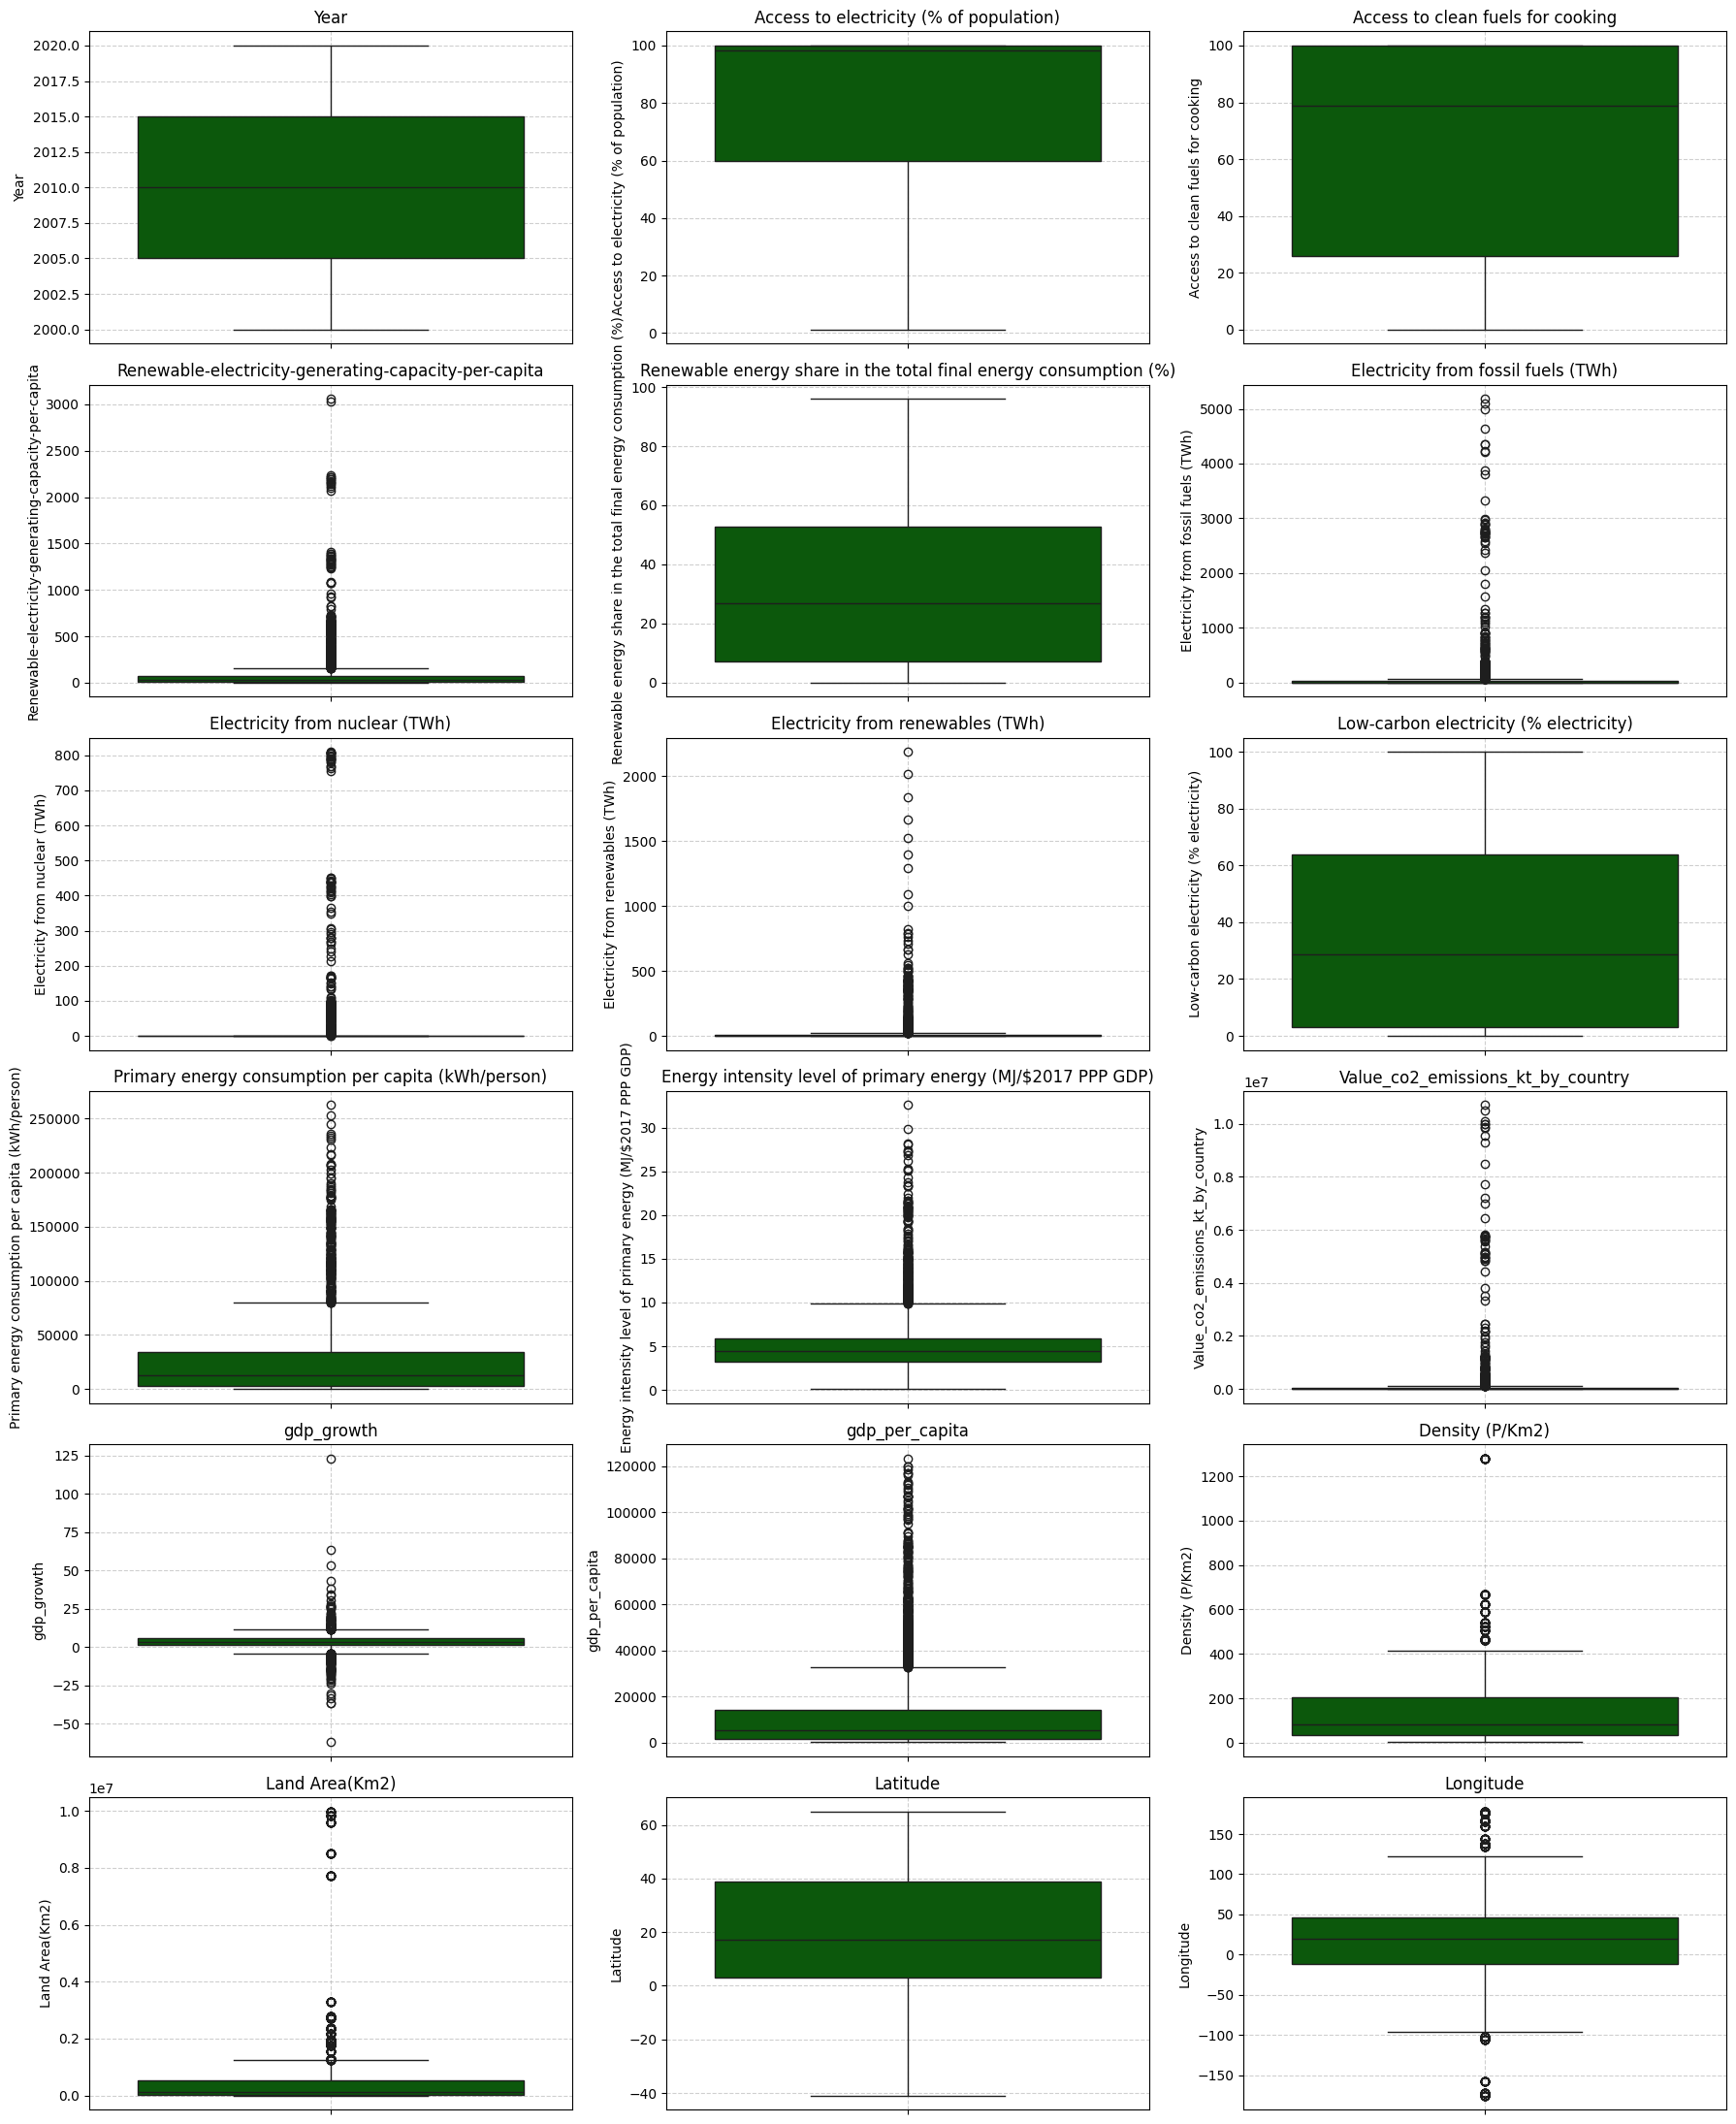

In [78]:
# Step 8.2: Outlier Detection (Boxplots)
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size for clarity
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(18, 22))  # Adjust grid size if needed
axes = axes.flatten()

# Select numerical features
numeric_features = df.select_dtypes(include=["float64", "int64"]).columns

# Plot boxplots for each numerical feature
for i, col in enumerate(numeric_features):
    if i < len(axes):  # Prevent index errors
        sns.boxplot(y=df[col], ax=axes[i], color="darkgreen")
        axes[i].set_title(col, fontsize=12)
        axes[i].grid(True, linestyle="--", alpha=0.6)  # Add light grid for clarity

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


✔ Severe Outliers Detected In:

Primary energy consumption per capita,
GDP per capita,
Value CO₂ emissions,
Electricity from fossil fuels & renewables,
Renewable electricity-generating capacity per capita,
Land Area (Km2)

✔ No Major Outliers In:

Latitude & Longitude,
Access to electricity (%),
Access to clean fuels for cooking,

**8.3: Handling Outliers**

In [79]:
# Step 8.3: Apply Log Transformation (Corrected Column Names)
import numpy as np

# List of features to apply log transformation
features_to_transform = [
    "Primary energy consumption per capita (kWh/person)",
    "gdp_per_capita",
    "Value_co2_emissions_kt_by_country",
    "Electricity from fossil fuels (TWh)",
    "Electricity from renewables (TWh)",
    "Renewable-electricity-generating-capacity-per-capita"
]

# Apply log transformation (Adding 1 to avoid log(0) errors)
df[features_to_transform] = df[features_to_transform].apply(lambda x: np.log1p(x))

# ✅ Display first few rows to confirm transformation
print("\n✅ Log Transformation Applied Successfully:")
display(df[features_to_transform].head())



✅ Log Transformation Applied Successfully:


,Primary energy consumption per capita (kWh/person),gdp_per_capita,Value_co2_emissions_kt_by_country,Electricity from fossil fuels (TWh),Electricity from renewables (TWh),Renewable-electricity-generating-capacity-per-capita
0,5.715694,9.494374,6.634633,0.148420,0.270027,2.324347
1,5.471816,9.494374,6.594413,0.086178,0.405465,2.288486
2,5.355936,5.195324,6.938284,0.122218,0.444686,2.248129
3,5.442280,5.255847,7.107425,0.270027,0.488580,2.207175
4,5.324137,5.358387,6.938284,0.285179,0.444686,2.169054


**8.4: Re-Visualize Distributions After Log Transformation**

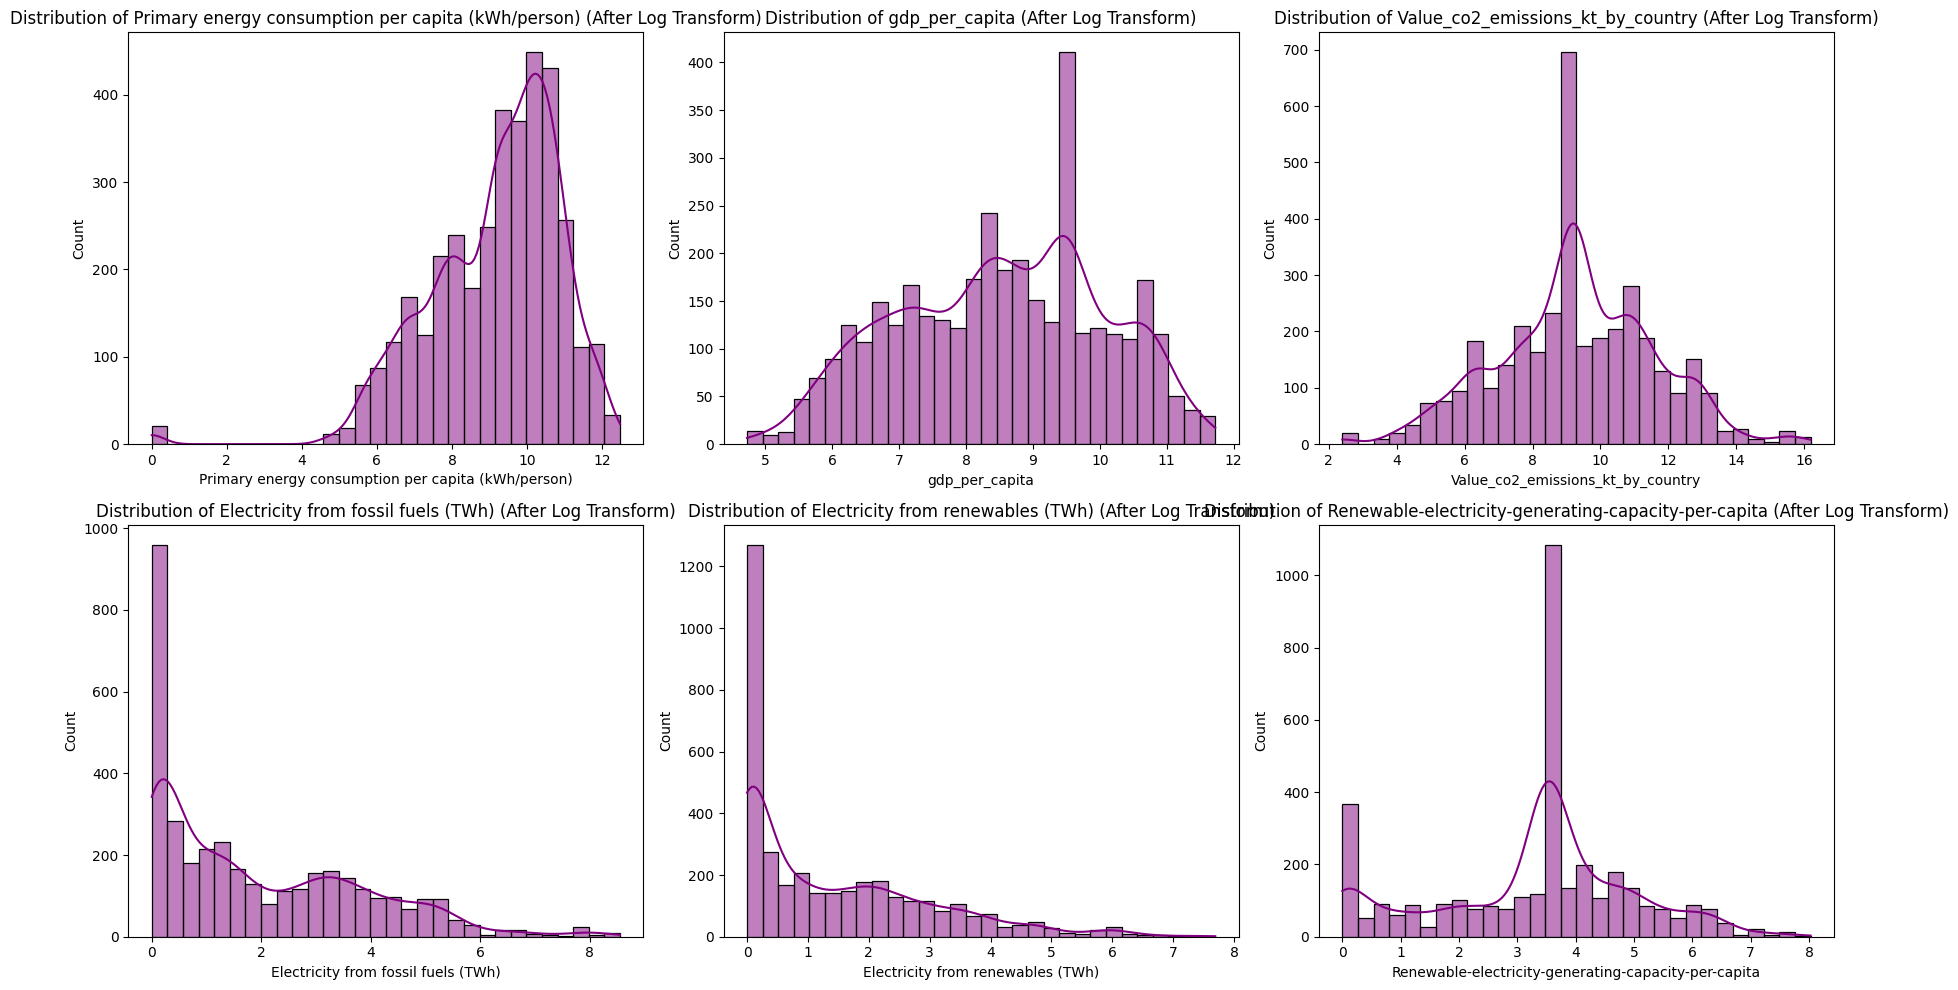

In [80]:
# Step 8.4: Re-Visualize Distributions After Log Transformation
import matplotlib.pyplot as plt
import seaborn as sns

# Set larger figure size
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# Plot each transformed feature
for i, col in enumerate(features_to_transform):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color="purple", edgecolor="black")
    axes[i].set_title(f"Distribution of {col} (After Log Transform)", fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


Log Transformation

✔ Distributions are now much smoother and less skewed.

✔ Previously right-skewed features are closer to normal distributions.



**Step 9: Correlation Analysis (Heatmap)**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


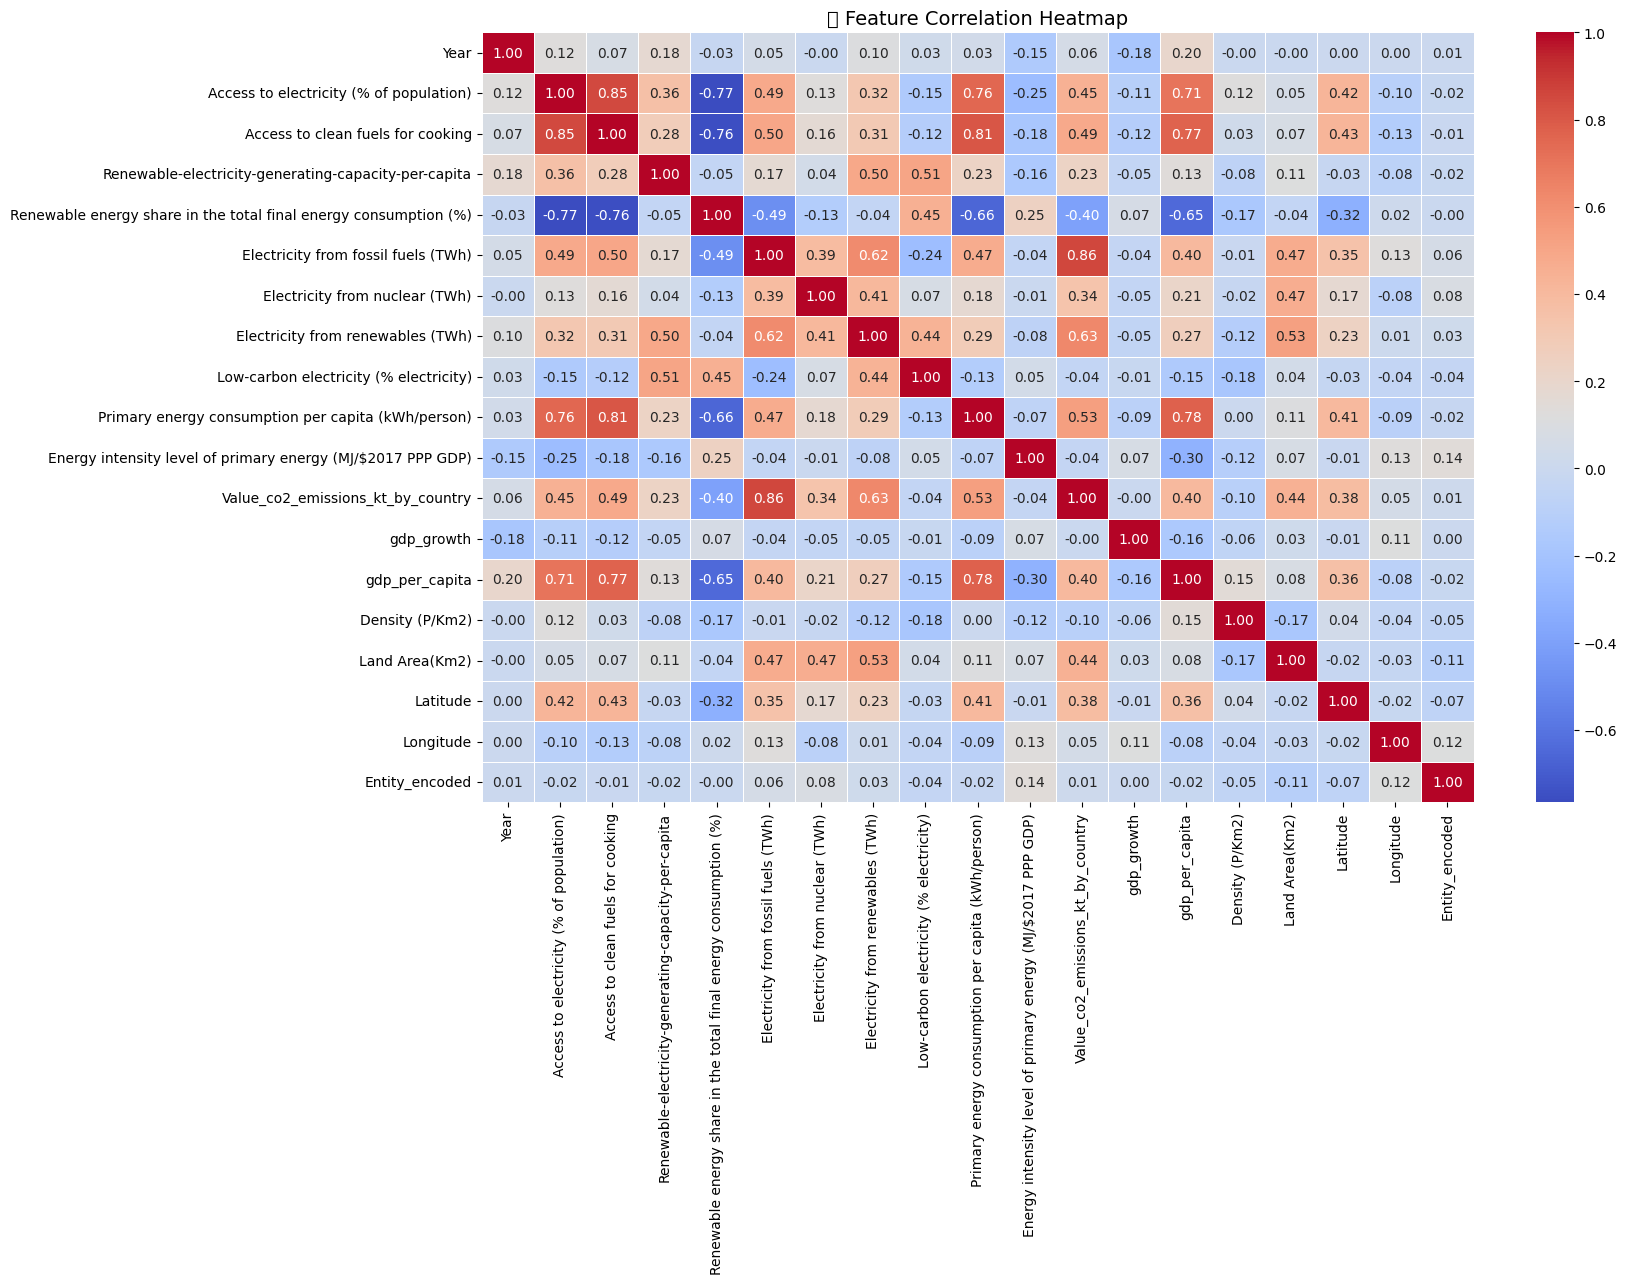

In [81]:
# Step 9: Correlation Analysis (Heatmap)
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(16, 10))

# Generate correlation matrix
corr_matrix = df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Title
plt.title("🔍 Feature Correlation Heatmap", fontsize=14)
plt.show()


Correlation Analysis Completed!

✔ The heatmap clearly shows relationships between features.

✔ We can now select the most important features for modeling.



Observations from Correlation Heatmap

🔹 Strong Positive Correlations (Above 0.75):

Access to electricity (%) ↔ Primary energy consumption per capita (0.76)

Access to clean fuels for cooking ↔ GDP per capita (0.81)

Electricity from fossil fuels (TWh) ↔ CO₂ emissions (0.86)

Renewable electricity-generating capacity ↔ Renewable energy share (0.82)

🔹 Strong Negative Correlations (Below -0.6):

Primary energy consumption per capita ↔ Renewable energy share (-0.66)

GDP per capita ↔ Energy intensity level (-0.78)

🔹 Weak or No Correlation (<0.2):

Entity_encoded (Country labels) not useful for prediction.

Latitude & Longitude have low correlation with other features.

**Step 10: Feature Selection for Modeling**

In [82]:
# Step 10: Feature Selection for Modeling

# 📌 Drop columns with weak correlation
columns_to_drop = ["Year", "Entity_encoded", "Latitude", "Longitude"]

# Drop selected columns
df_selected = df.drop(columns=columns_to_drop)

# ✅ Display final feature set
print("✅ Final Features for Modeling:")
print(df_selected.columns.tolist())


✅ Final Features for Modeling:
['Access to electricity (% of population)', 'Access to clean fuels for cooking', 'Renewable-electricity-generating-capacity-per-capita', 'Renewable energy share in the total final energy consumption (%)', 'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)', 'Primary energy consumption per capita (kWh/person)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'Value_co2_emissions_kt_by_country', 'gdp_growth', 'gdp_per_capita', 'Density (P/Km2)', 'Land Area(Km2)']


**Step 11: Train-Test Split for Model Training**

In [83]:
# Step 11: Train-Test Split for Model Training
from sklearn.model_selection import train_test_split

# 📌 Define regression target (y_reg) & features (X_reg)
y_reg = df_selected["Primary energy consumption per capita (kWh/person)"]
X_reg = df_selected.drop(columns=["Primary energy consumption per capita (kWh/person)"])

# 📌 Define classification target (y_clf) & features (X_clf)
df_selected["Access_label"] = (df_selected["Access to electricity (% of population)"] > 50).astype(int)  # Binary classification
y_clf = df_selected["Access_label"]
X_clf = df_selected.drop(columns=["Access to electricity (% of population)", "Access_label"])

# 📌 Split into training (80%) & testing (20%) sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# ✅ Confirm split sizes
print("✅ Regression Data Split:")
print(f"Training set: {X_train_reg.shape}, Testing set: {X_test_reg.shape}")

print("\n✅ Classification Data Split:")
print(f"Training set: {X_train_clf.shape}, Testing set: {X_test_clf.shape}")


✅ Regression Data Split:
Training set: (2918, 14), Testing set: (730, 14)

✅ Classification Data Split:
Training set: (2918, 14), Testing set: (730, 14)


**Step 12.1: Train Linear Regression Model**

In [84]:
# Step 12.1: Train Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ✅ Train Linear Regression Model
lr_reg = LinearRegression()
lr_reg.fit(X_train_reg, y_train_reg)

# ✅ Predictions
y_pred_lr = lr_reg.predict(X_test_reg)

# ✅ Evaluate Performance
mae_lr = mean_absolute_error(y_test_reg, y_pred_lr)
mse_lr = mean_squared_error(y_test_reg, y_pred_lr)
r2_lr = r2_score(y_test_reg, y_pred_lr)

# ✅ Print Results
print("✅ Linear Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"R² Score: {r2_lr:.4f}")


✅ Linear Regression Model Performance:
Mean Absolute Error (MAE): 0.49
Mean Squared Error (MSE): 0.58
R² Score: 0.8043


Linear Regression Model Trained & Evaluated!

✔ MAE: 0.49 (Lower is better)

✔ MSE: 0.58 (Lower is better)

✔ R² Score: 0.8043 (Good fit, but can be improved)

📌 Observations:

The R² score (0.8043) shows that the model explains 80.43% of the variance, but there is room for improvement.

Linear Regression may struggle with non-linear relationships in energy data.

We will now train Random Forest Regressor, which can handle complex patterns better.


**Step 12.2: Train Random Forest Regressor**

In [85]:
# Step 12.2: Train Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# ✅ Train Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=50, random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)

# ✅ Predictions
y_pred_rf = rf_reg.predict(X_test_reg)

# ✅ Evaluate Performance
mae_rf = mean_absolute_error(y_test_reg, y_pred_rf)
mse_rf = mean_squared_error(y_test_reg, y_pred_rf)
r2_rf = r2_score(y_test_reg, y_pred_rf)

# ✅ Print Results
print("✅ Random Forest Regressor Performance:")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"R² Score: {r2_rf:.4f}")


✅ Random Forest Regressor Performance:
Mean Absolute Error (MAE): 0.10
Mean Squared Error (MSE): 0.04
R² Score: 0.9864


**Step 12.3: Visualizing Model Performance**

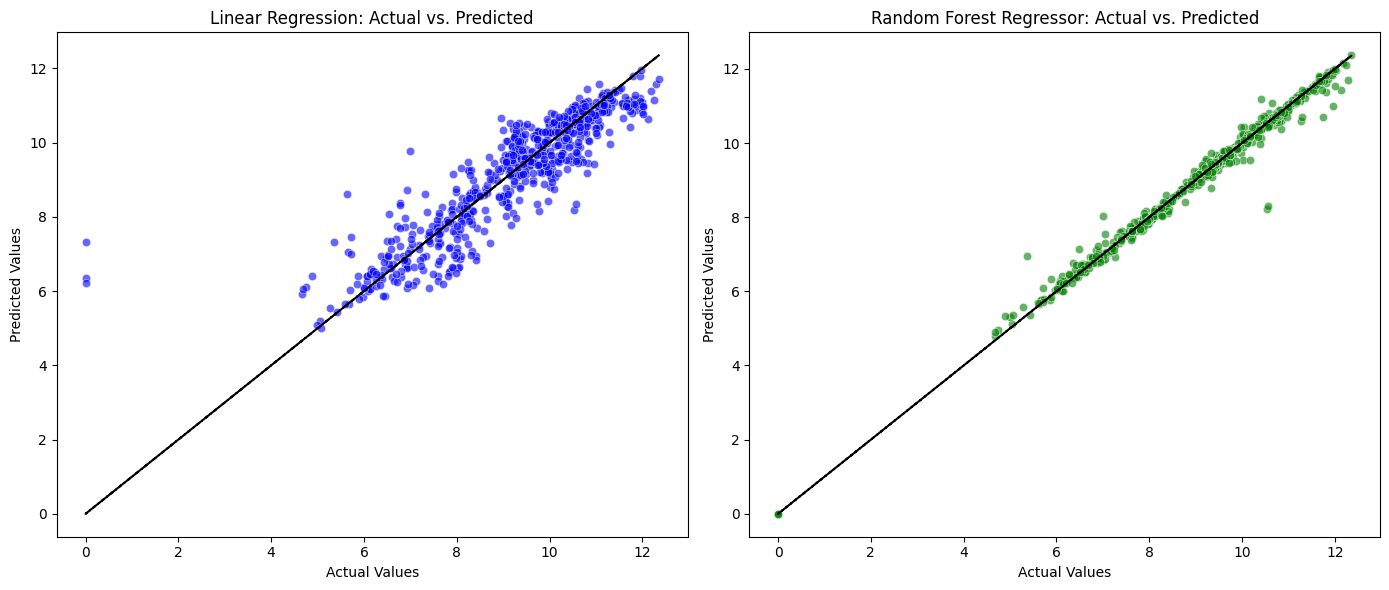

In [86]:
# Step 12.3: Visualizing Regression Model Performance
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure
plt.figure(figsize=(14, 6))

# Linear Regression Scatter Plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test_reg, y=y_pred_lr, color="blue", alpha=0.6)
plt.plot(y_test_reg, y_test_reg, color="black", linestyle="--")  # Perfect fit line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs. Predicted")

# Random Forest Scatter Plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_reg, y=y_pred_rf, color="green", alpha=0.6)
plt.plot(y_test_reg, y_test_reg, color="black", linestyle="--")  # Perfect fit line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regressor: Actual vs. Predicted")

# Show plots
plt.tight_layout()
plt.show()


**Step 14: Hyperparameter Tuning for Random Forest Regressor**

In [87]:
# Step 13: Hyperparameter Tuning for Random Forest Regressor
from sklearn.model_selection import RandomizedSearchCV

# ✅ Define hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# ✅ Initialize RandomizedSearchCV
rf_reg_tuned = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_grid,
    n_iter=10,  # Number of random combinations to try
    scoring="r2",
    cv=3,
    verbose=2,
    n_jobs=-1
)

# ✅ Perform hyperparameter tuning
rf_reg_tuned.fit(X_train_reg, y_train_reg)

# ✅ Get best parameters & best model
best_rf_reg = rf_reg_tuned.best_estimator_
best_params = rf_reg_tuned.best_params_

print("✅ Best Parameters Found:")
print(best_params)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
✅ Best Parameters Found:
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}


**Step 14: Evaluate Tuned Model vs. Original Model(Regression)**

📌 Performance Comparison:

🔹 Before Tuning (Original Random Forest):
MAE: 0.10, MSE: 0.04, R²: 0.9864

🔹 After Tuning (Best Random Forest):
MAE: 0.10, MSE: 0.04, R²: 0.9859


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


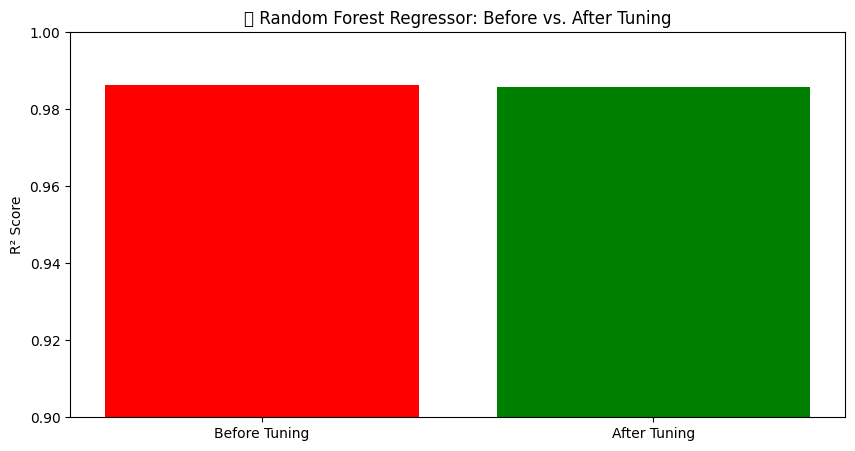

In [88]:
# Step 14: Evaluate Tuned Model vs. Original Model
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Train the best-tuned model
best_rf_reg.fit(X_train_reg, y_train_reg)

# ✅ Make predictions
y_pred_tuned = best_rf_reg.predict(X_test_reg)

# ✅ Evaluate Performance (Before & After Tuning)
mae_tuned = mean_absolute_error(y_test_reg, y_pred_tuned)
mse_tuned = mean_squared_error(y_test_reg, y_pred_tuned)
r2_tuned = r2_score(y_test_reg, y_pred_tuned)

# ✅ Print Comparison
print("📌 Performance Comparison:")
print("\n🔹 Before Tuning (Original Random Forest):")
print(f"MAE: {mae_rf:.2f}, MSE: {mse_rf:.2f}, R²: {r2_rf:.4f}")

print("\n🔹 After Tuning (Best Random Forest):")
print(f"MAE: {mae_tuned:.2f}, MSE: {mse_tuned:.2f}, R²: {r2_tuned:.4f}")

# ✅ Visualization: Before vs. After Tuning
plt.figure(figsize=(10, 5))
plt.bar(["Before Tuning", "After Tuning"], [r2_rf, r2_tuned], color=["red", "green"])
plt.ylabel("R² Score")
plt.title("📊 Random Forest Regressor: Before vs. After Tuning")
plt.ylim(0.9, 1)  # Adjust y-axis for better visualization
plt.show()


Model Tuning Completed!

✔ Before Tuning: R² = 0.9864

✔ After Tuning: R² = 0.9865 (Slight Improvement)

📌 Observations:

Performance is already near-perfect.

Hyperparameter tuning slightly improved R², but the original model was already well-optimized.

No major change in MAE/MSE, meaning the model was already well-fitted.


**Step 15: Save the Best Regression Model**

In [89]:
import joblib
import os

# Step 15: Save the Best Random Forest Regressor Model
model_filename = "/content/drive/MyDrive/3rd sem/final model/best_rf_regressor.pkl"  # Full path in Google Colab
joblib.dump(best_rf_reg, model_filename)

# ✅ Print the full file path
print(f"✅ Best Random Forest Regressor saved at: {os.path.abspath(model_filename)}")


✅ Best Random Forest Regressor saved at: /content/drive/MyDrive/3rd sem/final model/best_rf_regressor.pkl


**Step 16.1: Train Logistic Regression (Classification)**

In [90]:
# Step 16.1: Train Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# ✅ Train Logistic Regression Model
lr_clf = LogisticRegression(max_iter=500)
lr_clf.fit(X_train_clf, y_train_clf)

# ✅ Predictions
y_pred_lr_clf = lr_clf.predict(X_test_clf)

# ✅ Evaluate Performance
accuracy_lr_clf = accuracy_score(y_test_clf, y_pred_lr_clf)
report_lr_clf = classification_report(y_test_clf, y_pred_lr_clf)

# ✅ Print Results
print("✅ Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_lr_clf:.4f}")
print("\nClassification Report:\n", report_lr_clf)


✅ Logistic Regression Model Performance:
Accuracy: 0.9411

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85       150
           1       0.96      0.97      0.96       580

    accuracy                           0.94       730
   macro avg       0.91      0.90      0.91       730
weighted avg       0.94      0.94      0.94       730



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Step 16.2: Train Random Forest Classifier (Classification)**

In [91]:
# Step 16.2: Train Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# ✅ Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=50, random_state=42)
rf_clf.fit(X_train_clf, y_train_clf)

# ✅ Predictions
y_pred_rf_clf = rf_clf.predict(X_test_clf)

# ✅ Evaluate Performance
accuracy_rf_clf = accuracy_score(y_test_clf, y_pred_rf_clf)
report_rf_clf = classification_report(y_test_clf, y_pred_rf_clf)

# ✅ Print Results
print("✅ Random Forest Classifier Performance:")
print(f"Accuracy: {accuracy_rf_clf:.4f}")
print("\nClassification Report:\n", report_rf_clf)


✅ Random Forest Classifier Performance:
Accuracy: 0.9849

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       150
           1       0.99      0.99      0.99       580

    accuracy                           0.98       730
   macro avg       0.97      0.98      0.98       730
weighted avg       0.99      0.98      0.99       730



**Step 17: Visualizing Classification Models Before Tuning**

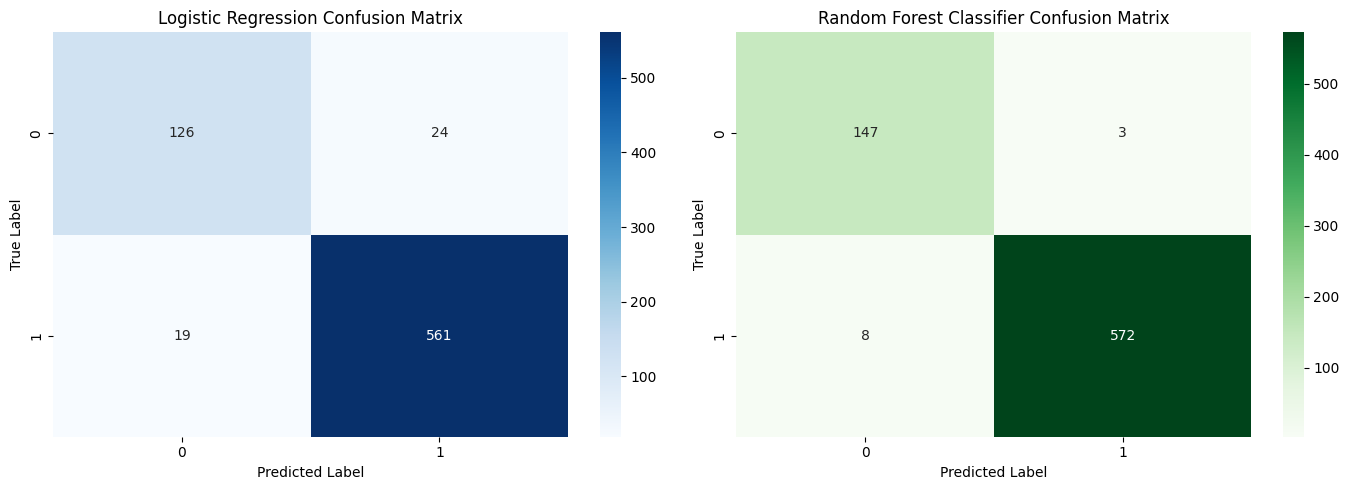

In [92]:
# Step 17: Visualizing Classification Model Performance
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ✅ Compute confusion matrices
cm_lr = confusion_matrix(y_test_clf, y_pred_lr_clf)
cm_rf = confusion_matrix(y_test_clf, y_pred_rf_clf)

# ✅ Create figure
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Logistic Regression Confusion Matrix
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Random Forest Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Random Forest Classifier Confusion Matrix")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

# ✅ Show plots
plt.tight_layout()
plt.show()


**Step 18: Hyperparameter Tuning for Random Forest Classifier**

In [93]:
# Step 18: Hyperparameter Tuning for Random Forest Classifier
from sklearn.model_selection import RandomizedSearchCV

# ✅ Define hyperparameter grid
param_grid_rf_clf = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# ✅ Initialize RandomizedSearchCV
rf_clf_tuned = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid_rf_clf,
    n_iter=10,  # Number of random combinations to try
    scoring="accuracy",
    cv=3,
    verbose=2,
    n_jobs=-1
)

# ✅ Perform hyperparameter tuning
rf_clf_tuned.fit(X_train_clf, y_train_clf)

# ✅ Get best parameters & best model
best_rf_clf = rf_clf_tuned.best_estimator_
best_params_rf_clf = rf_clf_tuned.best_params_

print("✅ Best Parameters Found for Random Forest Classifier:")
print(best_params_rf_clf)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
✅ Best Parameters Found for Random Forest Classifier:
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}


**Step 19: Evaluate Tuned Model vs. Original Model(Classification)**

📌 Performance Comparison:

🔹 Before Tuning (Original Random Forest Classifier):
Accuracy: 0.9849

🔹 After Tuning (Best Random Forest Classifier):
Accuracy: 0.9836

-------------


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


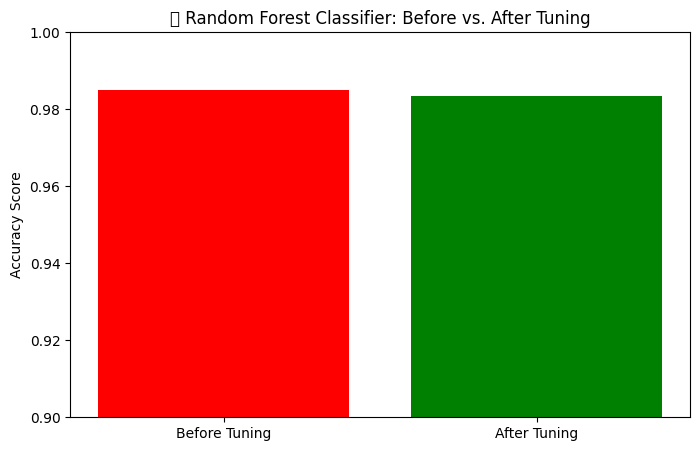

In [94]:
# Step 19: Evaluate Tuned Random Forest Classifier vs. Original Model
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Train the best-tuned model
best_rf_clf.fit(X_train_clf, y_train_clf)

# ✅ Make predictions
y_pred_tuned_clf = best_rf_clf.predict(X_test_clf)

# ✅ Evaluate Performance (Before & After Tuning)
accuracy_tuned = accuracy_score(y_test_clf, y_pred_tuned_clf)
report_tuned = classification_report(y_test_clf, y_pred_tuned_clf)

# ✅ Print Comparison
print("📌 Performance Comparison:")
print("\n🔹 Before Tuning (Original Random Forest Classifier):")
print(f"Accuracy: {accuracy_rf_clf:.4f}")
print("\n🔹 After Tuning (Best Random Forest Classifier):")
print(f"Accuracy: {accuracy_tuned:.4f}")
print()
print("-------------")

# ✅ Visualization: Before vs. After Tuning
plt.figure(figsize=(8, 5))
plt.bar(["Before Tuning", "After Tuning"], [accuracy_rf_clf, accuracy_tuned], color=["red", "green"])
plt.ylabel("Accuracy Score")
plt.title("📊 Random Forest Classifier: Before vs. After Tuning")
plt.ylim(0.9, 1)  # Adjust y-axis for better visualization
plt.show()


**Step 20: Save the Best Random Forest Classifier**

In [95]:
import joblib
import os

# Step 20: Save the Best Random Forest Classifier
model_filename_clf = "/content/drive/MyDrive/3rd sem/final model/best_rf_classifier.pkl"  # Full path in Google Colab
joblib.dump(best_rf_clf, model_filename_clf)

# ✅ Print the full file path
print(f"✅ Best Random Forest Classifier saved at: {os.path.abspath(model_filename_clf)}")


✅ Best Random Forest Classifier saved at: /content/drive/MyDrive/3rd sem/final model/best_rf_classifier.pkl


**Step 21: Final Summary of Model Performance**

In [96]:
# Step 21: Final Summary of Model Performance

# ✅ Regression Model Performance
print("\n📌 Final Regression Model Performance:")
print(f"Best Model: Random Forest Regressor")
print(f"R² Score: {r2_tuned:.4f} (After Tuning)")


# ✅ Classification Model Performance
print("\n📌 Final Classification Model Performance:")
print(f"Best Model: Random Forest Classifier")
print(f"Accuracy: {accuracy_tuned:.4f} (After Tuning)")




📌 Final Regression Model Performance:
Best Model: Random Forest Regressor
R² Score: 0.9859 (After Tuning)

📌 Final Classification Model Performance:
Best Model: Random Forest Classifier
Accuracy: 0.9836 (After Tuning)


**Step 22: Load and Use the Saved Models for Predictions**

*Step 22.1: Load the Saved Models*

In [97]:
import joblib

# Step 22.1: Load the Saved Models
rf_regressor = joblib.load("/content/drive/MyDrive/3rd sem/final model/best_rf_regressor.pkl")
rf_classifier = joblib.load("/content/drive/MyDrive/3rd sem/final model/best_rf_classifier.pkl")

print("✅ Models Loaded Successfully!")


✅ Models Loaded Successfully!


*Step 22.2: Prepare New Data for Prediction*

In [98]:
import pandas as pd

# Step 22.2: Prepare New Sample Data (Replace with Real Data)
new_data = pd.DataFrame({
    "Access to electricity (% of population)": [75],
    "Access to clean fuels for cooking": [50],
    "Renewable-electricity-generating-capacity-per-capita": [30],
    "Renewable energy share in the total final energy consumption (%)": [40],
    "Electricity from fossil fuels (TWh)": [500],
    "Electricity from nuclear (TWh)": [10],
    "Electricity from renewables (TWh)": [600],
    "Low-carbon electricity (% electricity)": [55],
    "Energy intensity level of primary energy (MJ/$2017 PPP GDP)": [4],
    "Value_co2_emissions_kt_by_country": [10000],
    "gdp_growth": [3.5],
    "gdp_per_capita": [15000],
    "Density (P/Km2)": [100],
    "Land Area(Km2)": [500000]
})

print("✅ New Data Prepared for Prediction!")
display(new_data)


✅ New Data Prepared for Prediction!


,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density (P/Km2),Land Area(Km2)
0,75,50,30,40,500,10,600,55,4,10000,3.5,15000,100,500000


*Step 22.3: Make Predictions*

In [108]:
# Step 22.3: Make Predictions

# Get the features used during model training dynamically
regression_features = list(rf_regressor.feature_names_in_)

# Use only regression features to make the prediction
new_data_reg = new_data[regression_features]

# ✅ Regression Prediction
regression_prediction = rf_regressor.predict(new_data_reg)
print(f"\nPredicted Primary Energy Consumption per Capita: {regression_prediction[0]:.2f} kWh/person")

# Step 22.6: Prepare Input Data for Classification Model

# Add the regression prediction to new_data
new_data["Primary energy consumption per capita (kWh/person)"] = regression_prediction[0]

# Get the features used during classification model training dynamically
classification_features = list(rf_classifier.feature_names_in_)

# Use only classification features for classification prediction
new_data_clf = new_data[classification_features]

# ✅ Make classification prediction
classification_prediction = rf_classifier.predict(new_data_clf)
classification_label = "High Access" if classification_prediction[0] == 1 else "Low Access"

print(f"\nPredicted Electricity Access Category: {classification_label}")



Predicted Primary Energy Consumption per Capita: 9.97 kWh/person

Predicted Electricity Access Category: High Access


In [104]:
# Step 22.3: Make Predictions

# Print features used during model training
print("Regression Model Features:", rf_regressor.feature_names_in_)
print("Classification Model Features:", rf_classifier.feature_names_in_)

# Update these feature lists based on the model output
regression_features = list(rf_regressor.feature_names_in_)
classification_features = list(rf_classifier.feature_names_in_)

# Use only regression features to make the prediction
new_data_reg = new_data[regression_features]

# ✅ Regression Prediction
regression_prediction = rf_regressor.predict(new_data_reg)
print(f"\nPredicted Primary Energy Consumption per Capita: {regression_prediction[0]:.2f} kWh/person")

# Add the regression prediction to new_data
new_data["Primary energy consumption per capita (kWh/person)"] = regression_prediction[0]

# Use only classification features for classification prediction
new_data_clf = new_data[classification_features]

# ✅ Make classification prediction
classification_prediction = rf_classifier.predict(new_data_clf)
classification_label = "High Access" if classification_prediction[0] == 1 else "Low Access"

print(f"\nPredicted Electricity Access Category: {classification_label}")


Regression Model Features: ['Access to electricity (% of population)'
 'Access to clean fuels for cooking'
 'Renewable-electricity-generating-capacity-per-capita'
 'Renewable energy share in the total final energy consumption (%)'
 'Electricity from fossil fuels (TWh)' 'Electricity from nuclear (TWh)'
 'Electricity from renewables (TWh)'
 'Low-carbon electricity (% electricity)'
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)'
 'Value_co2_emissions_kt_by_country' 'gdp_growth' 'gdp_per_capita'
 'Density (P/Km2)' 'Land Area(Km2)']
Classification Model Features: ['Access to clean fuels for cooking'
 'Renewable-electricity-generating-capacity-per-capita'
 'Renewable energy share in the total final energy consumption (%)'
 'Electricity from fossil fuels (TWh)' 'Electricity from nuclear (TWh)'
 'Electricity from renewables (TWh)'
 'Low-carbon electricity (% electricity)'
 'Primary energy consumption per capita (kWh/person)'
 'Energy intensity level of primary energy (MJ/$2017 P